# Agrupamiento en Herarchical Clustering

Estudiante Karen Natalia Martínez Romero, Grupo: 84

## Pasos de la actividad
Note que el punto 1,2,3 es el mismo en Tarea4-Grupo84_K-means y Tarea4-Grupo84_Herarchical_Clustering

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Entrenar el modelo configurando los diferentes hiperparámetros.
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
7. Interpretar, analizar y documentar los resultados obtenidos.

In [1359]:
# Cargar las librerías necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación de gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# Librerías para implementar modelo Jerarquico
from sklearn.cluster import AgglomerativeClustering # Algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler # Escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram # Herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
# dendrogram: genera un gráfico de árbol

# Librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples

# Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')

# Cargar el conjunto de datos en la variable data
data = pd.read_csv('D:\Ingenieria de sistemas\Semestre 7\ANÁLISIS DE DATOS\Tarea_4_AD\Mall_Customers.csv', sep=",")


### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1362]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [1364]:
# Obtener información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1366]:
# Generar estadísticas descriptivas para las columnas numéricas del DataFrame
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


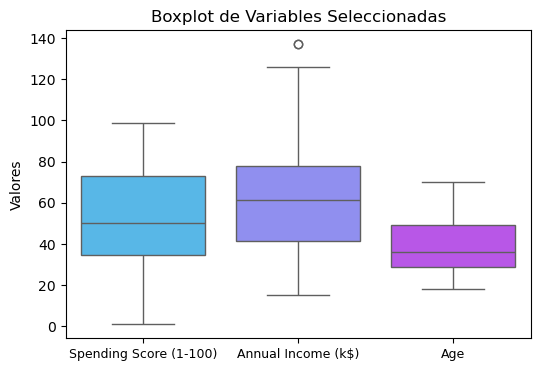

In [1433]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data[['Spending Score (1-100)', 'Annual Income (k$)', 'Age']], palette='cool')
plt.xticks(rotation=0, fontsize=9)
plt.title("Boxplot de Variables Seleccionadas", fontsize=12)
plt.ylabel("Valores", fontsize=10)
plt.show()

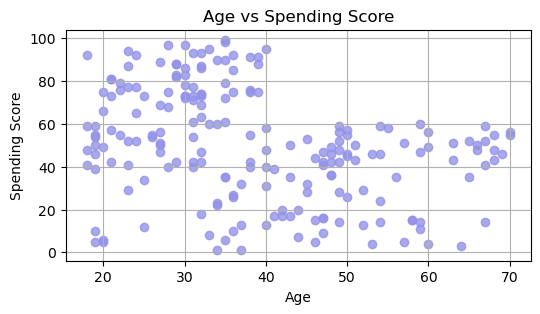

In [1435]:
plt.figure(figsize=(6, 3))

# Graficar Spending Score vs Age con tonos de azul
plt.scatter(data['Age'], data['Spending Score (1-100)'], color='#9392E8', alpha=0.8)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

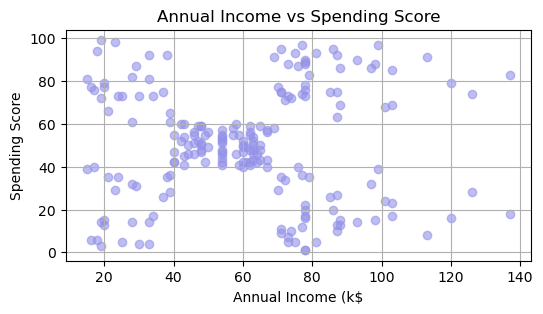

In [1437]:
plt.figure(figsize=(6, 3))

# Graficar Spending Score vs Age
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='#9392E8', alpha=0.6)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

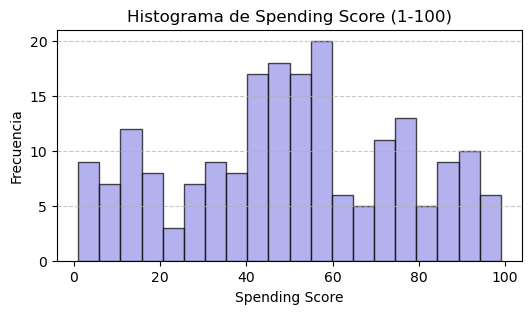

In [1439]:
# Crear el histograma
plt.figure(figsize=(6, 3))
plt.hist(data['Spending Score (1-100)'], bins=20, color='#9392E8', edgecolor='black', alpha=0.7)
plt.title('Histograma de Spending Score (1-100)')
plt.xlabel('Spending Score')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Resultado del Análisis exploratorio

En este caso, se esta actuando desde la pocision de propietario de un centro comercial de supermercado y, a través de tarjetas de membresía, se tienen algunos datos básicos sobre los clientes, como el ID del cliente, edad, género, ingreso anual y puntaje de gasto.

El "Spending Score" (Puntuación de Gastos) es un valor que se asigna al cliente basado en parámetros definidos por el propietario, como el comportamiento del cliente y los datos de compra.

Al actuar desde la pocision de dueño del centro comercial se desea comprender a los clientes, como identificar quiénes pueden convertirse fácilmente en clientes, para que esta información pueda ser proporcionada al equipo de marketing y así planificar la estrategia en consecuencia.

Se tienen 5 columnas, que se describen a continuación:

CustomerID - ID del cliente. Todos los datos son únicos y no hay valores faltantes, lo que indica que la información en esta columna es confiable. Sin embargo, no es relevante para crear el modelo, ya que es solo un identificador y no aporta información útil para el análisis o la predicción del comportamiento del cliente.

Gender - Sexo. Hay una proporción del 56% de mujeres y 44% de hombres y no contiene valores nulos. No hay valores nulos; sin embargo, se observa que el sexo está representado como "Male" o "Female". Es necesario convertir estas variables a valores numéricos para que puedan ser procesadas y analizadas correctamente el algoritmo 

Age - Edad. Las edades están dentro del rango de 18 a 70 años, lo cual es lógico y no contiene valores nulos. Por lo tanto, no se requieren correcciones o ajustes en esta columna, y puede ser utilizada directamente en el modelo como una variable relevante para el análisis. Al analizar los datos se puede ver que los clientes jóvenes tienden a tener una mayor variabilidad en sus puntajes de gasto, desde los niveles más bajos hasta los más altos. Esto sugiere que son un grupo diverso con distintos comportamientos de compra.

Annual Income (k$) - Ingreso anual, esta entre 15k y 137k y no contiene valores nulos, entre este rango se puede observar que la mayoría de los ingresos anuales están entre 40k y 80k, aunque se puede observar valores atípicos. Para mejorar su futura referencia, es mejor cambiar el nombre de la columna y remover el valor atípico.

Spending Score (1-100) - Puntaje de gasto. Va de 1 a 99, lo que indica que no hay ningún cliente con el puntaje máximo de 100 o nulo. Además, se observa que la mayoría de los valores están entre 40 y 60 y no se observan valores atípicos evidentes. Este rango es coherente, por lo tanto, no se requieren correcciones o ajustes en esta columna, y puede ser utilizada directamente en el modelo como una variable relevante para el análisis. Para mejorar su futura referencia, es mejor cambiar el nombre de la columna.


### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [1443]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Los cuartiles dividen a un conjunto de datos en cuatro partes iguales: el primer cuartil 𝑄1 separa al 25.0%, que abarca a los valores más pequeños, del 75.0% restante, constituido por los que son mayores. 
El segundo cuartil 𝑄2 es la mediana: 50.0% de sus valores son menores que la mediana y 50.0% son mayores. 
El tercer cuartil 𝑄3 separa al 25.0%, que abarca a los valores más grandes, del 75.0% restante constituido por los que son menores.
Referencia - Berenson, M. L., Levine, D. M., & Krehbiel, T. C. (2006). Estadística para administración. Pearson Educación.

Q3-Q1 se conoce como rango intercuartílico (IQR) y contiene todos los datos que se consideran normales 
Si un valor está más allá de 1.5 veces el rango intercuartílico (IQR), se considera atípico.

Asi las formulas son:
limite_inferior=Q1−(1.5×IQR)
limite_superior=Q3+(1.5×IQR)

In [1446]:
## Cambiar datos categóricos a valores numéricos
from sklearn.preprocessing import LabelEncoder  # Importar LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])  # Cambié 'Datos' a 'data'

#Crear el mapeo de etiquetas originales con los valores codificados
gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
print(gender_mappings)

{0: 0, 1: 1}


In [1448]:
def calcular_valores_atipicos(columna):
    # Calcular cuartiles
    Q1 = columna.quantile(0.25)  # Percentil 25
    Q3 = columna.quantile(0.75)  # Percentil 75
    IQR = Q3 - Q1  # Rango intercuartílico

    # Calcular límites
    limite_inferior = Q1 - 1.5 * IQR #Formula del límite inferior 
    limite_superior = Q3 + 1.5 * IQR #Formula del límite Superior 

    # Identificar valores atípicos
    atipicos = columna[(columna < limite_inferior) | (columna > limite_superior)]

    return atipicos, limite_inferior, limite_superior

# Llamar a la función para calcular los valores atípicos basados en quartiles
atipicos_Income, nivel_minimo_Income, nivel_maximo_Income = calcular_valores_atipicos(data['Annual Income (k$)'])

# Imprimir la cantidad de valores atípicos para Anual Income
print(f"El total de valores atípicos para Anual Income es: {len(atipicos_Income)}")
print(f"El total de valores atípicos para Anual Income es: {(nivel_minimo_Income)}")
print(f"El total de valores atípicos para Anual Income es: {(nivel_maximo_Income)}")

# Conteo de Datos Atípicos para Age
nivel_minimo_Age = 0
nivel_maximo_Age = 100
Total_Atipicos_Age = ((data['Age'] < nivel_minimo_Age) | (data['Age'] > nivel_maximo_Age)).sum()
print("El total de datos atípicos para Age es {}".format(Total_Atipicos))

# Conteo de Datos Atípicos para Score
nivel_minimo_Score = 0
nivel_maximo_Score = 100
Total_Atipicos = ((data['Spending Score (1-100)'] < nivel_minimo_Score) | (data['Spending Score (1-100)'] > nivel_maximo_Score)).sum()
print("El total de datos atípicos para Spending Score es {}".format(Total_Atipicos))

El total de valores atípicos para Anual Income es: 2
El total de valores atípicos para Anual Income es: -13.25
El total de valores atípicos para Anual Income es: 132.75
El total de datos atípicos para Age es 0
El total de datos atípicos para Spending Score es 0


In [1450]:
Datos_Atipicos = data[(data['Annual Income (k$)'] < nivel_minimo_Income) | (data['Annual Income (k$)'] > nivel_maximo_Income)]
Datos_Atipicos.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,1,32,137,18
199,200,1,30,137,83


In [1452]:
# Eliminar datos Atípicos para Anual Income 
Datos = data[(data['Annual Income (k$)'] < nivel_maximo_Income) & (data['Annual Income (k$)'] > nivel_minimo_Income)]

In [1454]:
# Renombrar columnas para simplificar
Datos.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

In [1456]:
# Obtener información general sobre el DataFrame
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      198 non-null    int64
 1   Gender          198 non-null    int64
 2   Age             198 non-null    int64
 3   Annual Income   198 non-null    int64
 4   Spending Score  198 non-null    int64
dtypes: int64(5)
memory usage: 9.3 KB


In [1458]:
Datos.head(5)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Al procesar los datos, se eliminaron dos valores atípicos de la columna Annual Income. Además, se modificó el tipo de dato de la columna Gender. Originalmente, esta columna contenía valores categóricos en formato object ('Male' y 'Female').Finalmente, se ajustaron los nombres de algunas columnas para simplificar su manejo. La columna Annual Income (k$) fue renombrada como Annual Income, y la columna Spending Score (1-100) pasó a llamarse Spending Score. Estos cambios aseguran una mejor legibilidad y manipulación de los datos en etapas posteriores del análisis.

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

A continuación, se seleccionan las características más relevantes que serán usadas para segmentar a los clientes con comportamientos similares en los modelos K-means y  Hierarchical Clustering.

Los datos almacenados en la base contienen características demográficas, a continuacion se describe la importancia de cada una de estas variables para el análisis:

Gender: El Genero puede influir en las preferencias de compra, ya que diferentes géneros podrían tener comportamientos distintos en cuanto a productos eue se ofrecen en el supermercado.

Age: En cuanto a la edad, hay que tener en cuenta que diferentes grupos de edades suelen tener necesidades y patrones de gasto que los diferencia de otros grupos.

Annual Income: Permite clasificar a los clientes según su capacidad de gasto, lo que ayuda a identificar grupos con patrones de consumo similares.

In [1462]:
# Eliminar la columna CurtomerID, no aporta información útil para el análisis
Datos.drop('CustomerID', axis=1, inplace=True)

In [1464]:
Datos.head(5)

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


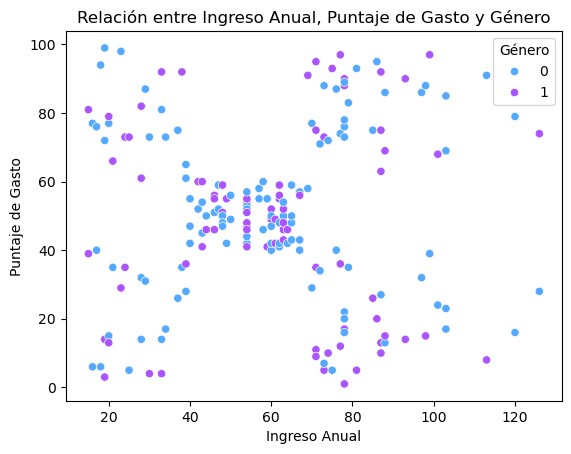

In [1466]:
sns.scatterplot(x=Datos['Annual Income'], y=Datos['Spending Score'], hue=Datos['Gender'], palette='cool')
plt.title('Relación entre Ingreso Anual, Puntaje de Gasto y Género')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.legend(title='Género')
plt.show()

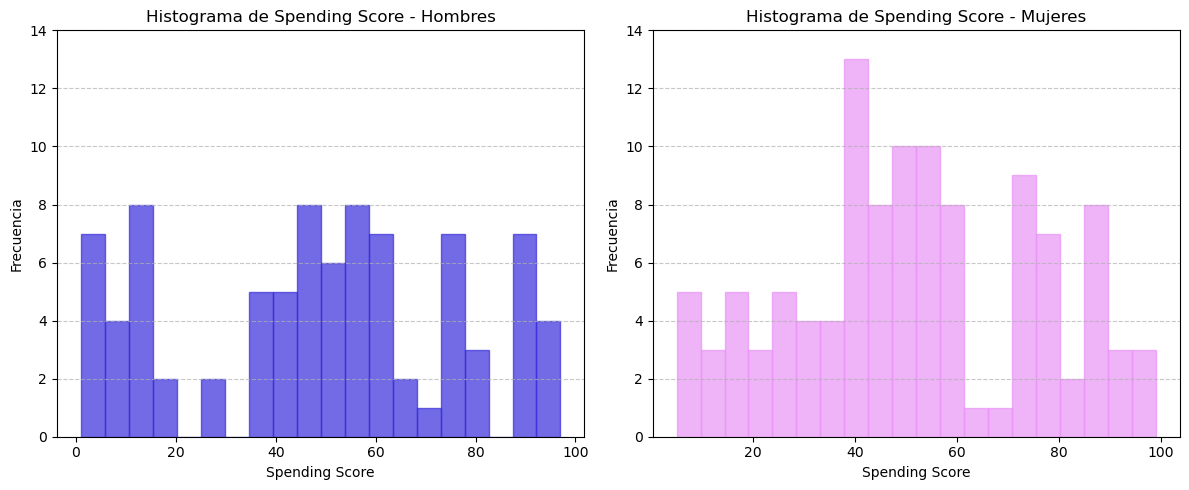

In [1468]:
male_data = Datos[Datos['Gender'] == 1]['Spending Score']
female_data = Datos[Datos['Gender'] == 0]['Spending Score']

# Crear subgráficos para los histogramas de hombres y mujeres
plt.figure(figsize=(12, 5))

# Histograma para hombres
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.hist(male_data, bins=20, alpha=0.7, color='#372CDB', edgecolor='#372CDB')
plt.title('Histograma de Spending Score - Hombres')
plt.xlabel('Spending Score')
plt.ylabel('Frecuencia')
plt.ylim(0, 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para mujeres
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.hist(female_data, bins=20, alpha=0.7, color='#E993F6', edgecolor='#E993F6')
plt.title('Histograma de Spending Score - Mujeres')
plt.xlabel('Spending Score')
plt.ylabel('Frecuencia')
plt.ylim(0, 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

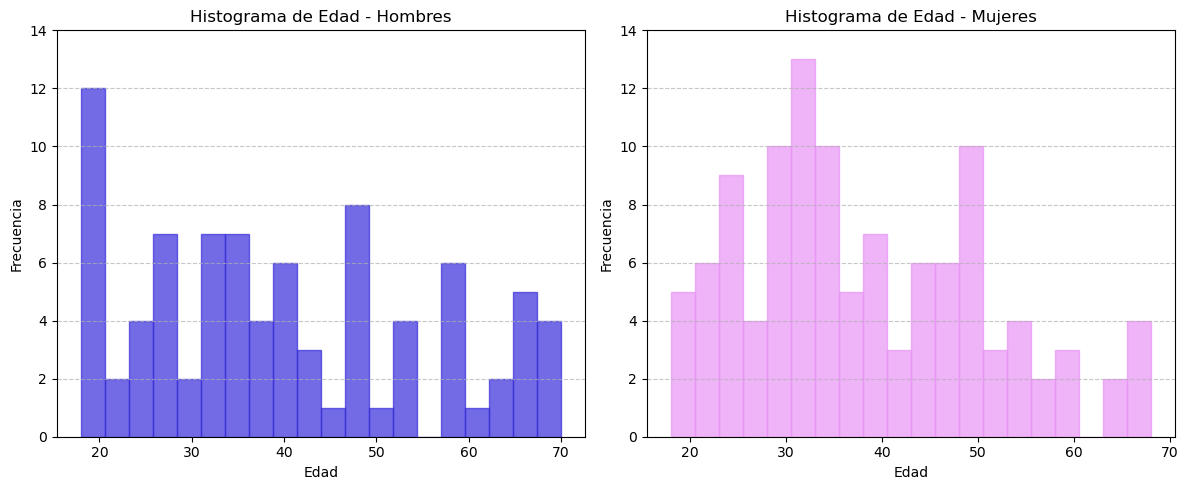

In [1470]:
male_data = Datos[Datos['Gender'] == 1]['Age']
female_data = Datos[Datos['Gender'] == 0]['Age']

# Crear subgráficos para los histogramas de hombres y mujeres
plt.figure(figsize=(12, 5))

# Histograma para hombres
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.hist(male_data, bins=20, alpha=0.7, color='#372CDB', edgecolor='#372CDB')
plt.title('Histograma de Edad - Hombres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.ylim(0, 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para mujeres
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.hist(female_data, bins=20, alpha=0.7, color='#E993F6', edgecolor='#E993F6')
plt.title('Histograma de Edad - Mujeres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.ylim(0, 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

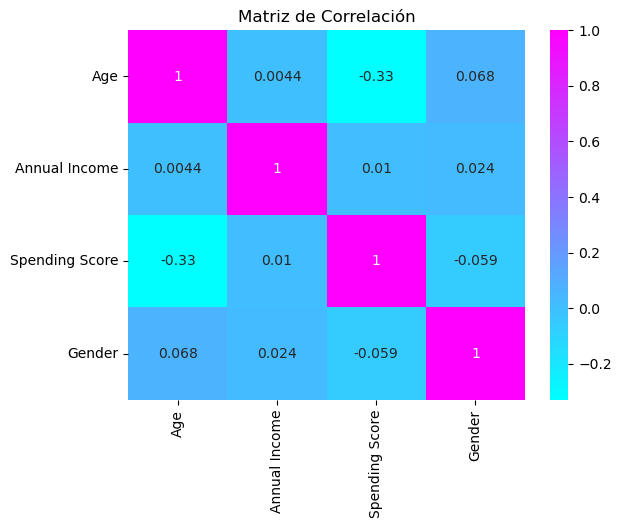

In [1403]:
correlation_matrix = Datos[['Age', 'Annual Income', 'Spending Score', 'Gender']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title('Matriz de Correlación')
plt.show()

In [1405]:
# Eliminar la columna Gender ya que es una variable categórica con valores discretos, lo cual no se adapta bien al cálculo de distancias 
Datos.drop('Gender', axis=1, inplace=True)

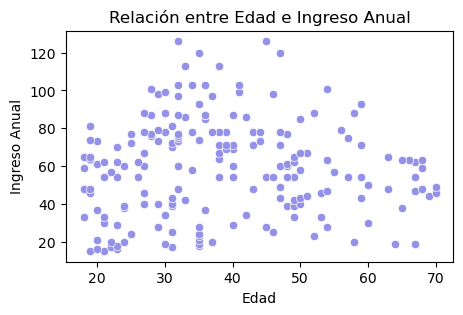

In [1407]:
# Gráfica de relación entre Edad e Ingreso Anual
plt.figure(figsize=(5, 3))
sns.scatterplot(x=Datos['Age'], y=Datos['Annual Income'], color='#9392E8')
plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [1410]:
scaler = StandardScaler()

# Escalar todas las columnas en el DataFrame Datos
scaled_data = scaler.fit_transform(Datos)

# Convertir el resultado a un DataFrame para mejor interpretación
scaled_data_df = pd.DataFrame(scaled_data, columns=Datos.columns)
print(scaled_data_df.head(5))

        Age  Annual Income  Spending Score
0 -1.425414      -1.779171       -0.435989
1 -1.282367      -1.779171        1.199413
2 -1.353890      -1.739447       -1.720949
3 -1.139319      -1.739447        1.043661
4 -0.567131      -1.699723       -0.397051


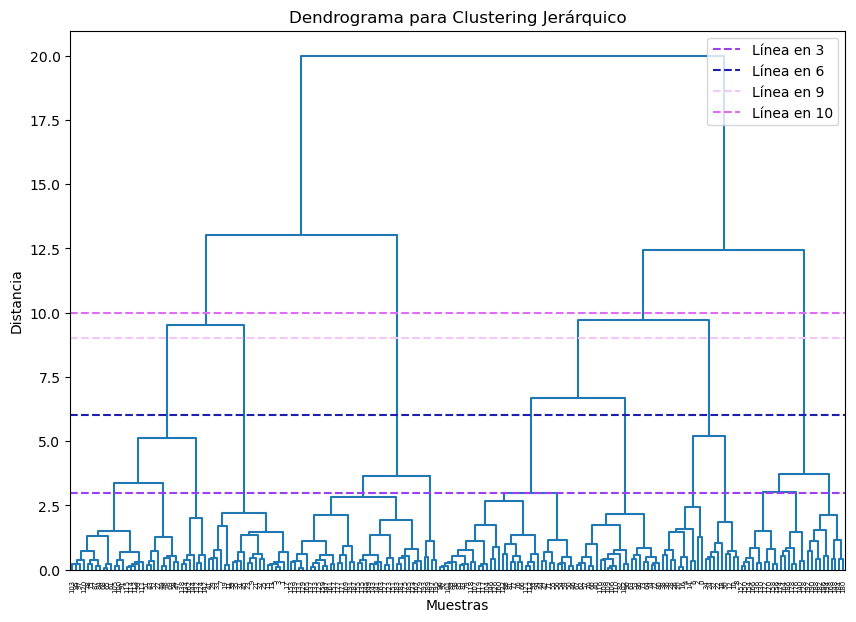

In [1412]:
# Realizar el enlace jerárquico utilizando el método de Ward
linked = linkage(scaled_data, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    color_threshold=0
)

# Añadir líneas horizontales
plt.axhline(y=3, color='#9C3EF4', linestyle='--', label='Línea en 3')
plt.axhline(y=6, color='#1E1EB0', linestyle='--', label='Línea en 6')
plt.axhline(y=9, color='#F2C7FA', linestyle='--', label='Línea en 9')
plt.axhline(y=10, color='#DF6BF6', linestyle='--', label='Línea en 10')

# Añadir título, etiquetas y leyenda
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.legend()
plt.show()

Este dendrograma ayuda a entender cuántos grupos de clientes existen en función de las variables Edad, Ingreso Anual y Puntaje de Gasto y cómo se relacionan entre sí. Esto sirve para entender mejor a los clientes y hacer estrategias de marketing más efectivas.

Para determinar el número adecuado de clústeres, se trazan varias líneas horizontales en el dendrograma a diferentes alturas. Por ejemplo, al cortar en la altura 10, se formarían 2 grupos principales; al cortar en la altura 8, se obtendrían 4 clústeres; en la altura 6, se formarían 5 clústeres; y al reducir la altura a 4, se dividirían en 7 grupos. Este análisis permite explorar diferentes niveles de segmentación, dependiendo de la granularidad deseada.

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

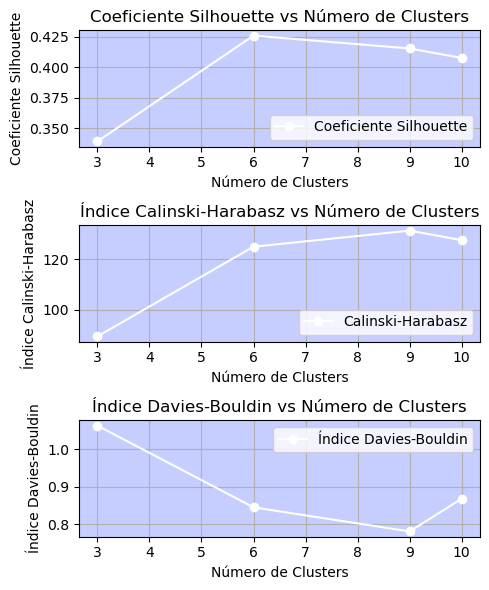

In [1416]:
# Rango de clusters
range_n_clusters = [3,6,9,10]

# Listas para almacenar los valores de las métricas
calinski_harabasz_scores = []
silhouette_scores = []
davies_bouldin_scores = []

# Calcular métricas para cada número de clusters
for i in range_n_clusters:
    # Crear y ajustar el modelo de clustering jerárquico
    model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    labels = model.fit_predict(scaled_data)  # Usar los datos escalados previamente
    
    # Calinski-Harabasz
    calinski_harabasz_scores.append(calinski_harabasz_score(scaled_data, labels))
    
    # Coeficiente de Silhouette
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    
    # Índice Davies-Bouldin
    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, labels))

# Crear los gráficos para las tres métricas
plt.figure(figsize=(5, 6))

# Coeficiente Silhouette
plt.subplot(3, 1, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='white', label="Coeficiente Silhouette")
plt.gca().set_facecolor('#C6CDFF')
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente Silhouette")
plt.title("Coeficiente Silhouette vs Número de Clusters")
plt.grid(True)
plt.legend()

# Índice Calinski-Harabasz
plt.subplot(3, 1, 2)
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o', color='white', label="Calinski-Harabasz")
plt.gca().set_facecolor('#C6CDFF')
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Calinski-Harabasz")
plt.title("Índice Calinski-Harabasz vs Número de Clusters")
plt.grid(True)
plt.legend()

# Índice Davies-Bouldin
plt.subplot(3, 1, 3)
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o', color='white', label="Índice Davies-Bouldin")
plt.gca().set_facecolor('#C6CDFF')
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Davies-Bouldin")
plt.title("Índice Davies-Bouldin vs Número de Clusters")
plt.grid(True)
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [1417]:
# Entrenamiento del modelo de Clustering Jerárquico
n_clusters=9
model = AgglomerativeClustering(n_clusters, linkage='ward')  # Ajustar el número de clusters según el dendrograma
labels = model.fit_predict(scaled_data)  # Usar los datos escalados previamente

In [1420]:
# Desempeño del modelo con el Coeficiente de Silhouette, el Índice de Calinski-Harabasz y el Índice de Davies-Bouldin
Observaciones = len(Datos)

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Número de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Índice Calinski-Harabasz", ch_score],
    ["Índice Davies-Bouldin", db_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Métrica", "Valor"], tablefmt="pretty"))

+--------------------------+--------------------+
|         Métrica          |       Valor        |
+--------------------------+--------------------+
| Número de Observaciones  |        198         |
|  Coeficiente Silhouette  | 0.4153886985414888 |
| Índice Calinski-Harabasz | 131.24011832800474 |
|  Índice Davies-Bouldin   | 0.7802513836713247 |
+--------------------------+--------------------+


Con base en los resultados presentados, podemos analizar el desempeño del modelo de clustering:
El Coeficiente de Silhouette de 0. 0.415 indica que el modelo no tiene una segmentación ideal de los grupos, pero a pesar de que no se acerca a 1 el modelo está dentro de un rango medio lo que indica que los datos están razonablemente bien agrupados, pero que hay una proximidad elevada o hasta puede haber superposición de algunos grupos. Este coeficiente no esta muy alejado del que se obtuvo en el modelo K-means.
El Índice de Calinski-Harabasz que es de 132.24, respalda los datos obtenidos con el Coeficiente de Silhouette, sin embargo es menor que el resultado obtenido en el modelo K-means, aunque no demasiado.
Finalmente, el Índice Davies-Bouldin es de 0.78 el cual es un resultado es aceptable, aunque de nuevo no es mejor que el modelo K-means.

## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Silhouette Score: 0.4153886985414888


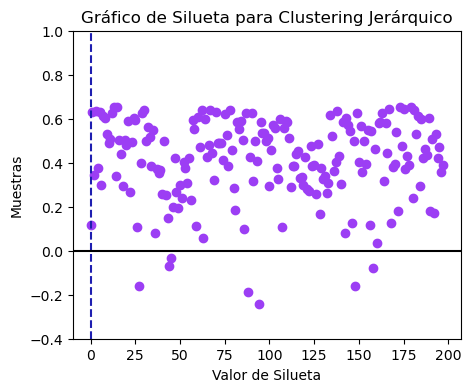

In [1424]:
# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, labels)
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(sample_silhouette_values, 'bo', color="#9C3EF4")  # 'bo' indica puntos azules
ax.axvline(x=silhouette_avg, color="#1E1EB0", linestyle="--")  # Línea vertical para el promedio de silueta
ax.axhline(y=0, color="black", linestyle="-")  # Línea horizontal en y=0
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
ax.set_ylim(-0.4, 1)

plt.show()


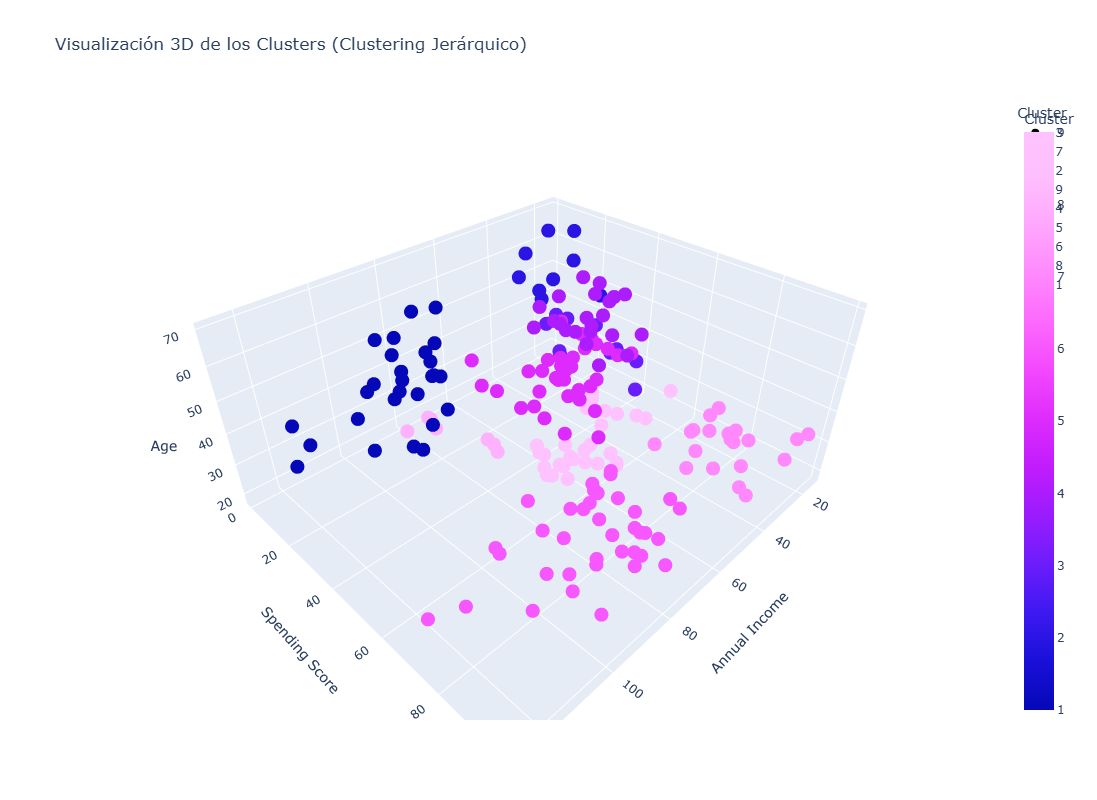

In [1426]:
# Crear un DataFrame con los datos originales y las etiquetas del Clustering Jerárquico
data_with_clusters_hierarchical = pd.DataFrame(Datos, columns=['Age', 'Annual Income', 'Spending Score'])
data_with_clusters_hierarchical['Cluster'] = cluster_labels  # Etiquetas obtenidas del dendrograma

# Crear el gráfico 3D
Grafica_3D = px.scatter_3d(
    data_with_clusters_hierarchical,
    x='Annual Income',
    y='Spending Score',
    z='Age',
    color='Cluster',
    symbol='Cluster',
    symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle', 7: 'circle', 8: 'circle', 9: 'circle'},
    color_continuous_scale='plotly3',  # Paleta de colores
    title="Visualización 3D de los Clusters (Clustering Jerárquico)"
)

# Actualizar el diseño
Grafica_3D.update_layout(
    scene=dict(
        xaxis_title='Annual Income',
        yaxis_title='Spending Score',
        zaxis_title='Age'
    ),
    width=1000,
    height=800
)

# Mostrar la gráfica
Grafica_3D.show()


## 7. Interpretar, analizar y documentar los resultados obtenidos.

Con base en los resultados presentados, podemos analizar el desempeño del modelo de clustering:
El Coeficiente de Silhouette de 0. 0.415 indica que el modelo no tiene una segmentación ideal de los grupos, pero a pesar de que no se acerca a 1 el modelo está dentro de un rango medio lo que indica que los datos están razonablemente bien agrupados, pero que hay una proximidad elevada o hasta puede haber superposición de algunos grupos. Este coeficiente no esta muy alejado del que se obtuvo en el modelo K-means.
Pasando al análisis de los gráficos (Figura #), se puede observar que mayoría de las muestras tienen valores positivos, lo que muestra que están bien asignadas a sus respectivos clústeres. Sin embargo, algunos puntos con valores cercanos a cero o negativos podrían estar mal clasificados o en zonas de superposición entre clústeres. 
 
El Índice de Calinski-Harabasz que es de 132.24, respalda los datos obtenidos con el Coeficiente de Silhouette, sin embargo es menor que el resultado obtenido en el modelo K-means, aunque no demasiado.
Finalmente, el Índice Davies-Bouldin es de 0.78 el cual es un resultado es aceptable, aunque de nuevo no es mejor que el modelo K-means.
Una vez que se ha comprobado que el grafico tiene una calidad aceptable, se puede pasar a interpretar las variables luego de la segmentación, aunque los resultados son similares a los obtenidos en el modelo K-means, aquí se va a destacar algunos puntos diferenciales o que no fueron mencionados en el modelo anterior:
Jóvenes con Ingreso Medio (Figura #)- Se puede observar un grupo de clientes con puntaje menor a 60, que tiene un ingreso anual promedio y en su mayoría tiene una edad menor a los 30 años. Para este grupo de clientes al igual que para los clientes con alto puntaje, pero con ingresos bajos, se podían lanzar campañas promocionales y así subir la media del puntaje dentro de esta población

Adultos y Adultos Mayores con Ingresos Medios (Figura #)- Se destaca este grupo de clientes con puntaje entre 40 y 60 aproximadamente, que tiene un ingreso anual promedio y en su mayoría tiene una edad mayor a los 55 años. Para este grupo de clientes, se podrían ofrecer incentivos como descuentos o beneficios exclusivos para fidelizarlos y aumentar su nivel de gasto, sin embargo sería necesaria más información y análisis para entender las necesidades de este grupo.

Al concluir los dos modelos y el análisis de sus resultados, podemos concluir que ambos métodos, K-means y Clustering Jerárquico, presentan una calidad no ideal pero si dentro de lo aceptable en la segmentación, pero con diferencias importantes. El modelo K-means mostró métricas ligeramente superiores, con un mayor índice de Calinski-Harabasz y un menor índice Davies-Bouldin, lo que sugiere que su segmentación es más compacta y mejor separada. Por otro lado, el Clustering Jerárquico permitió explorar diferentes grupos de clientes, que con el método de K-means no fueron evidentes, lo cual sugiere que en este concreto caso de estudio este método permitió tener visión más flexible de cómo se relacionan los clústeres a diferentes niveles.
